In [1]:
import os

import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax import config
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 4})


jax.config.update("jax_enable_x64", True)
from A4M2 import PKS
from auxx import gen_initX

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=22.0 @ T=2.0...


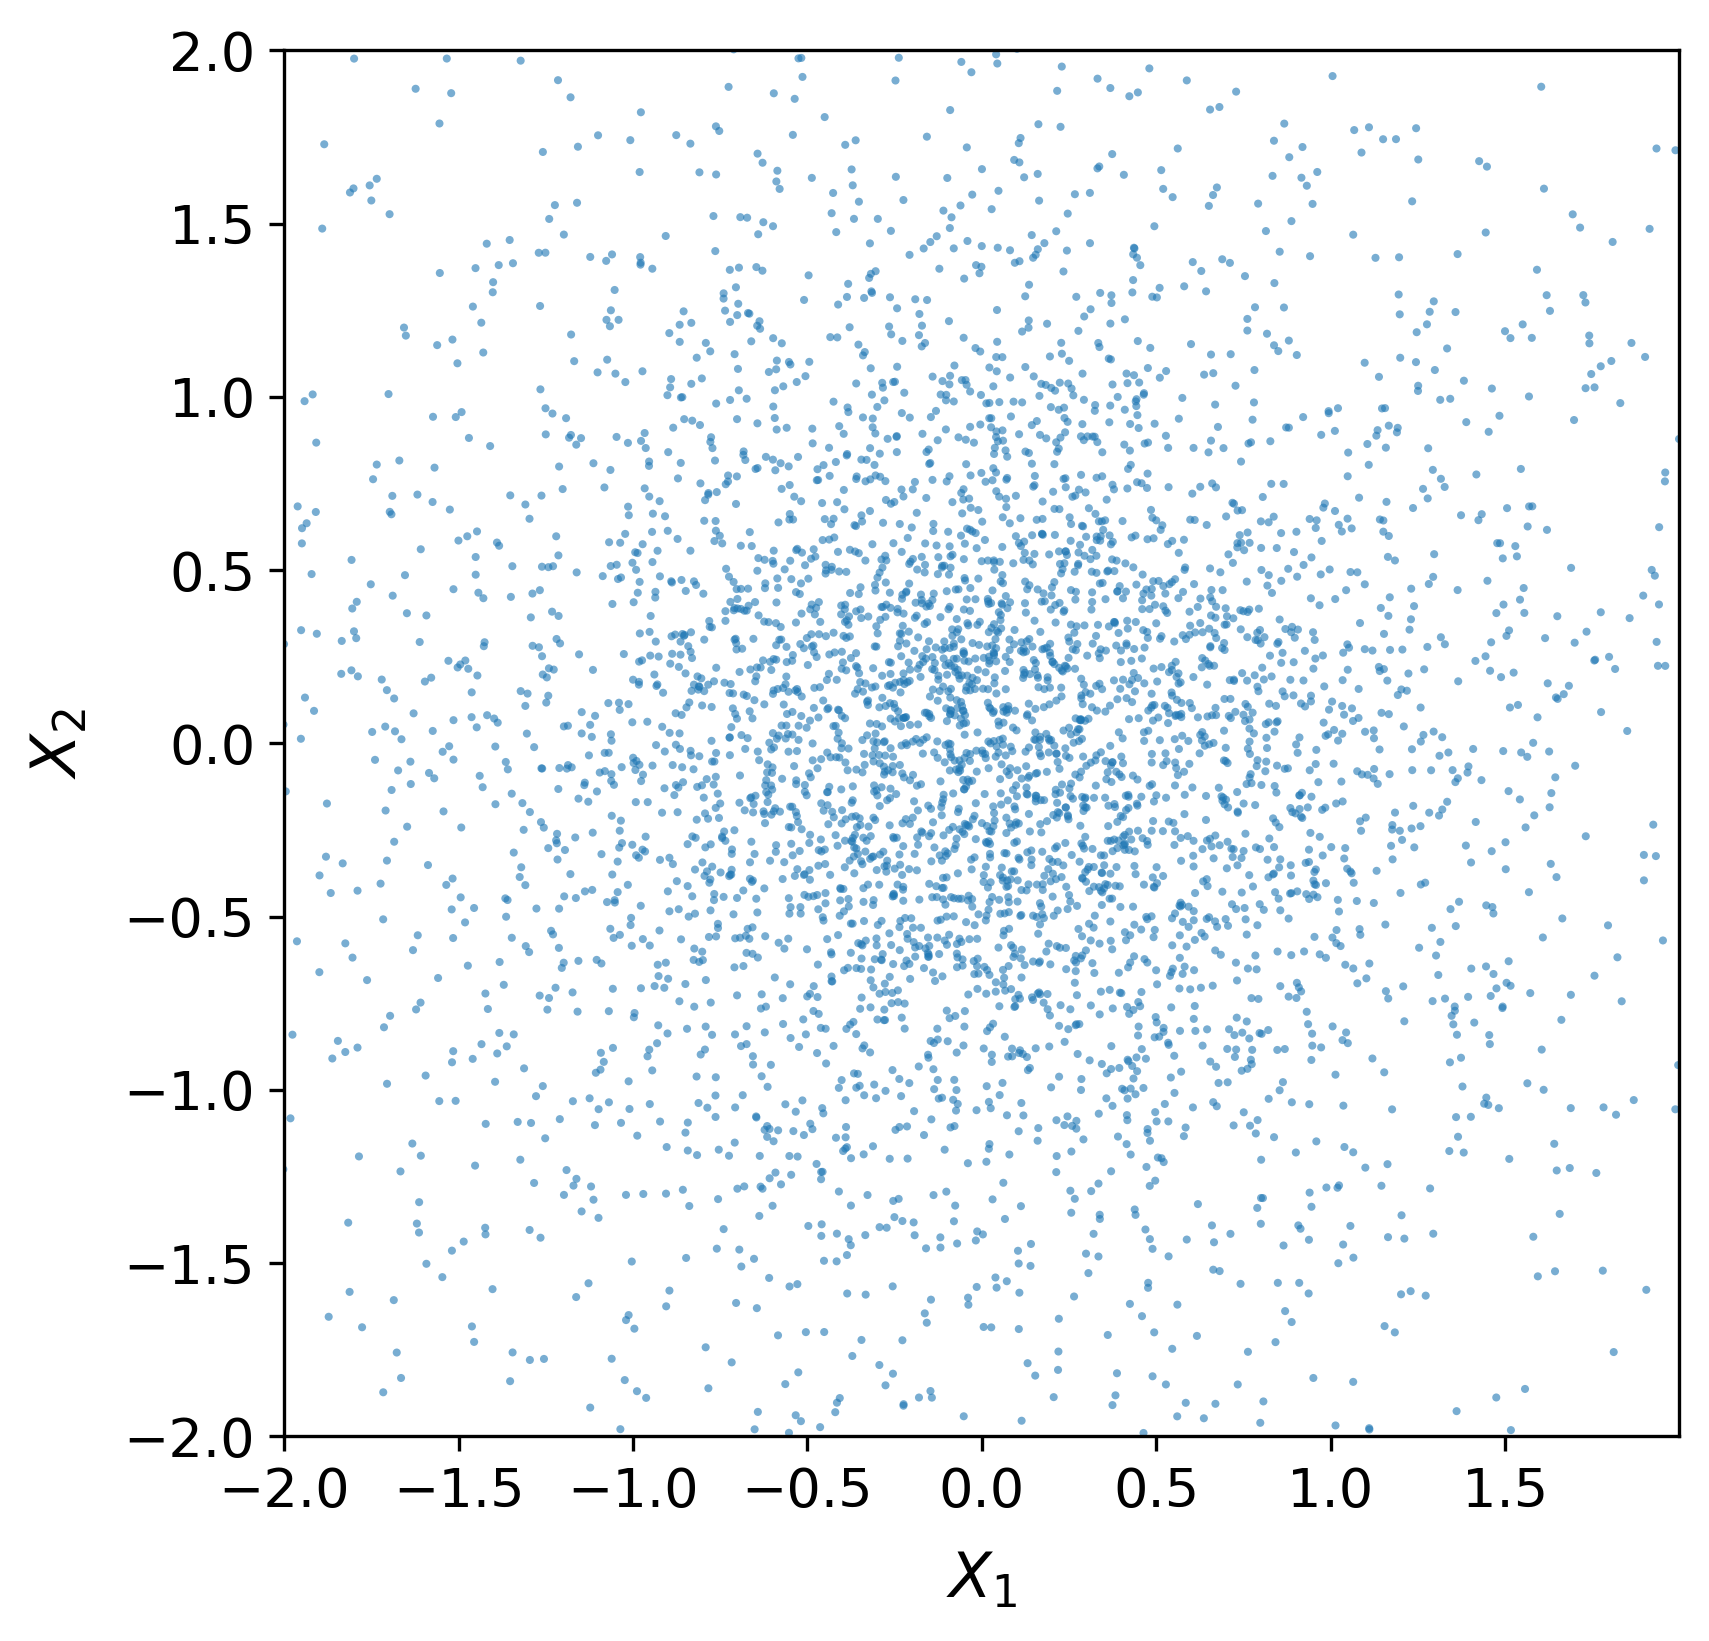

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=23.0 @ T=2.0...


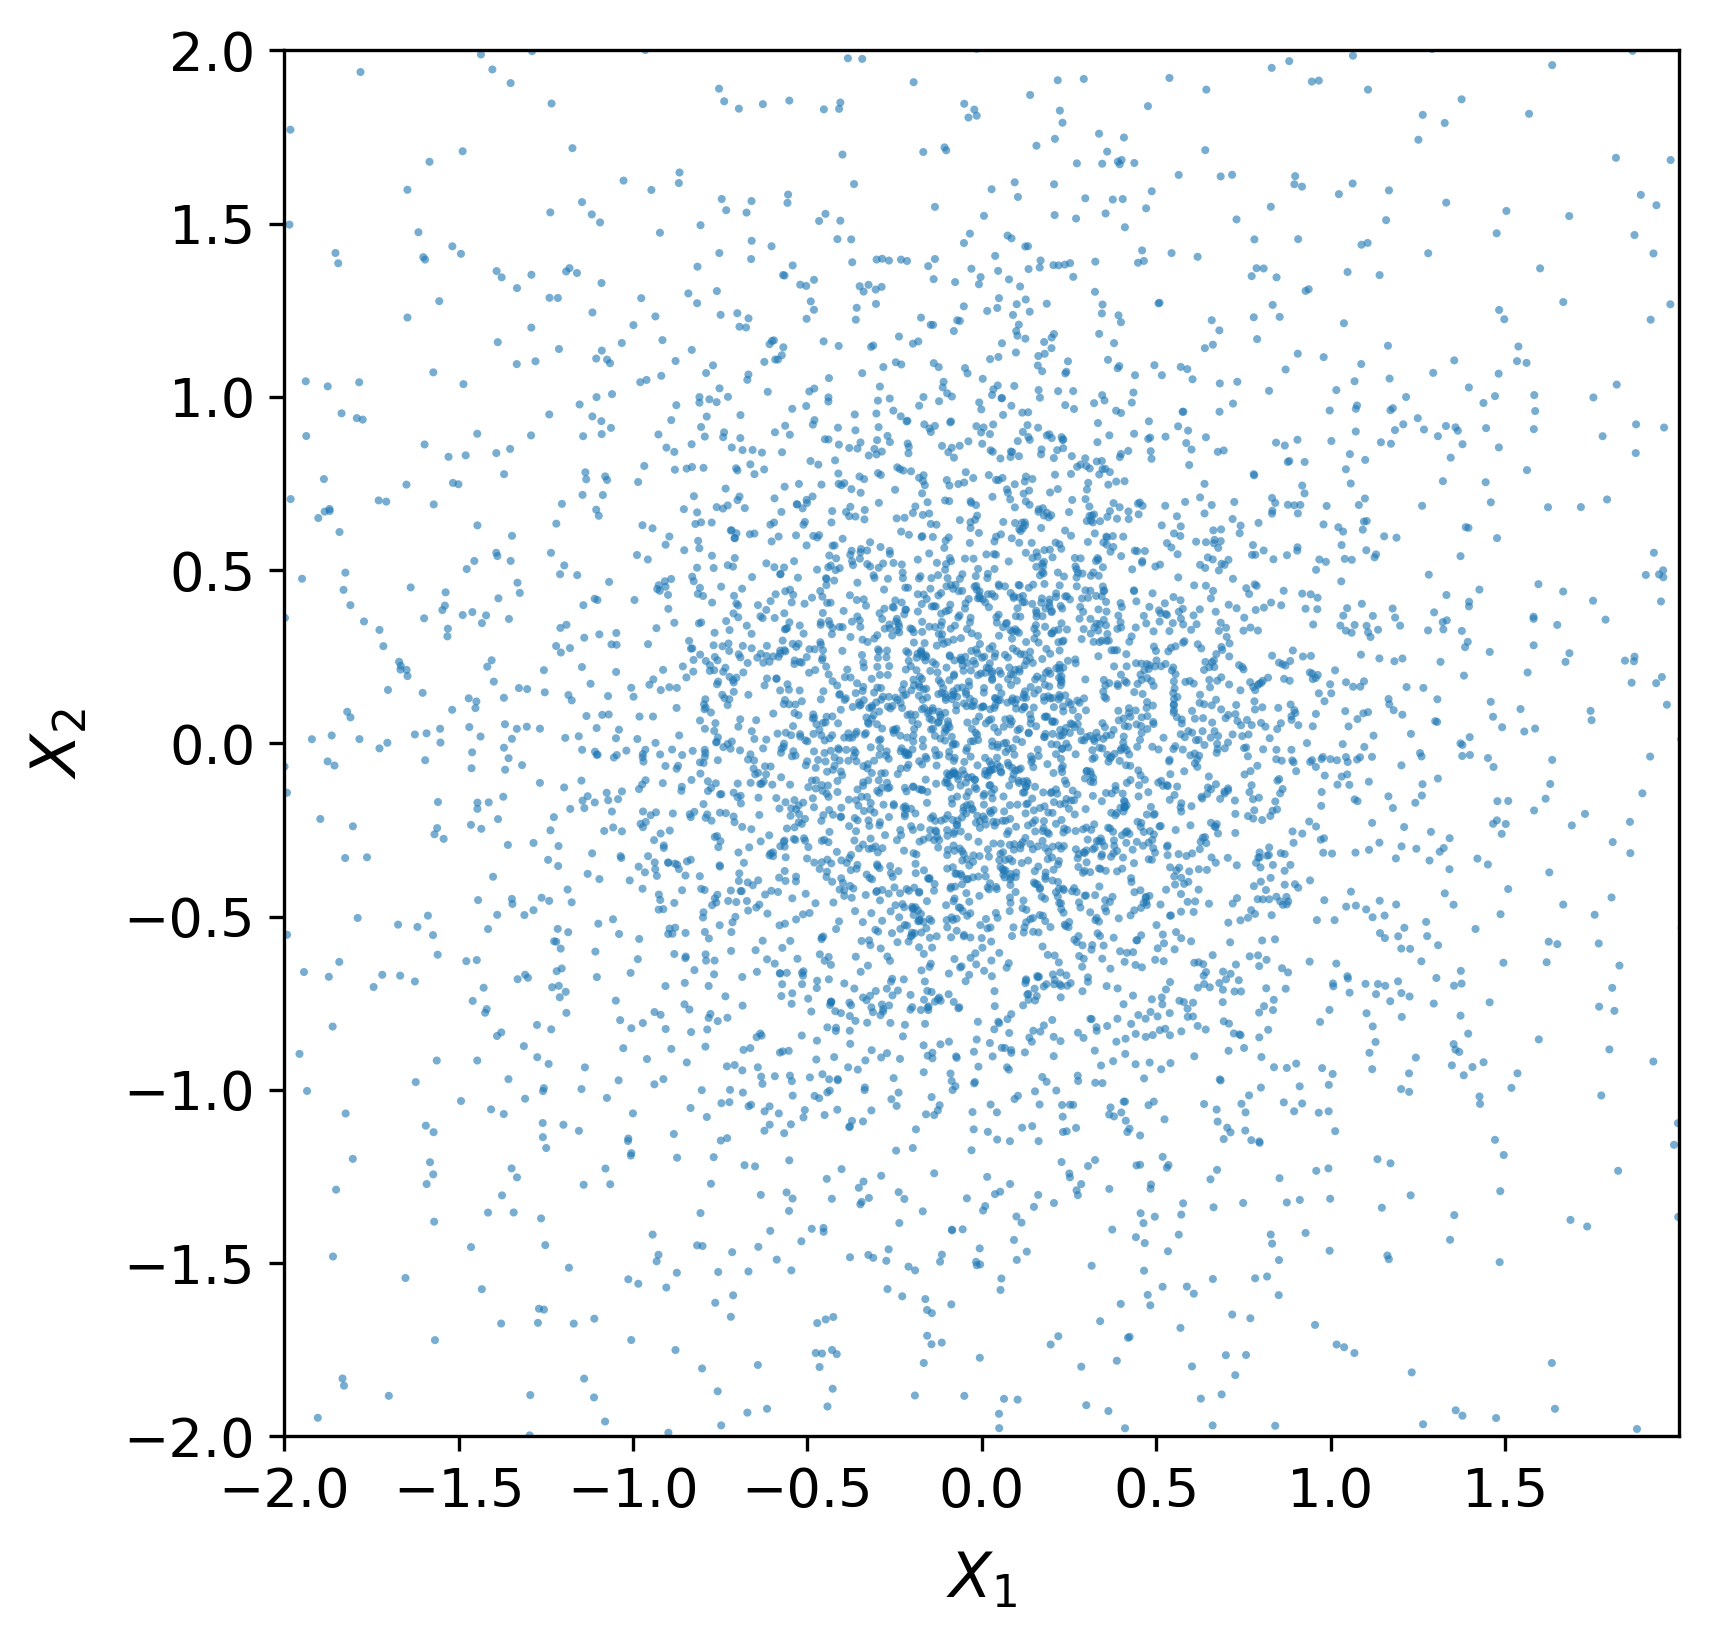

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=24.0 @ T=2.0...


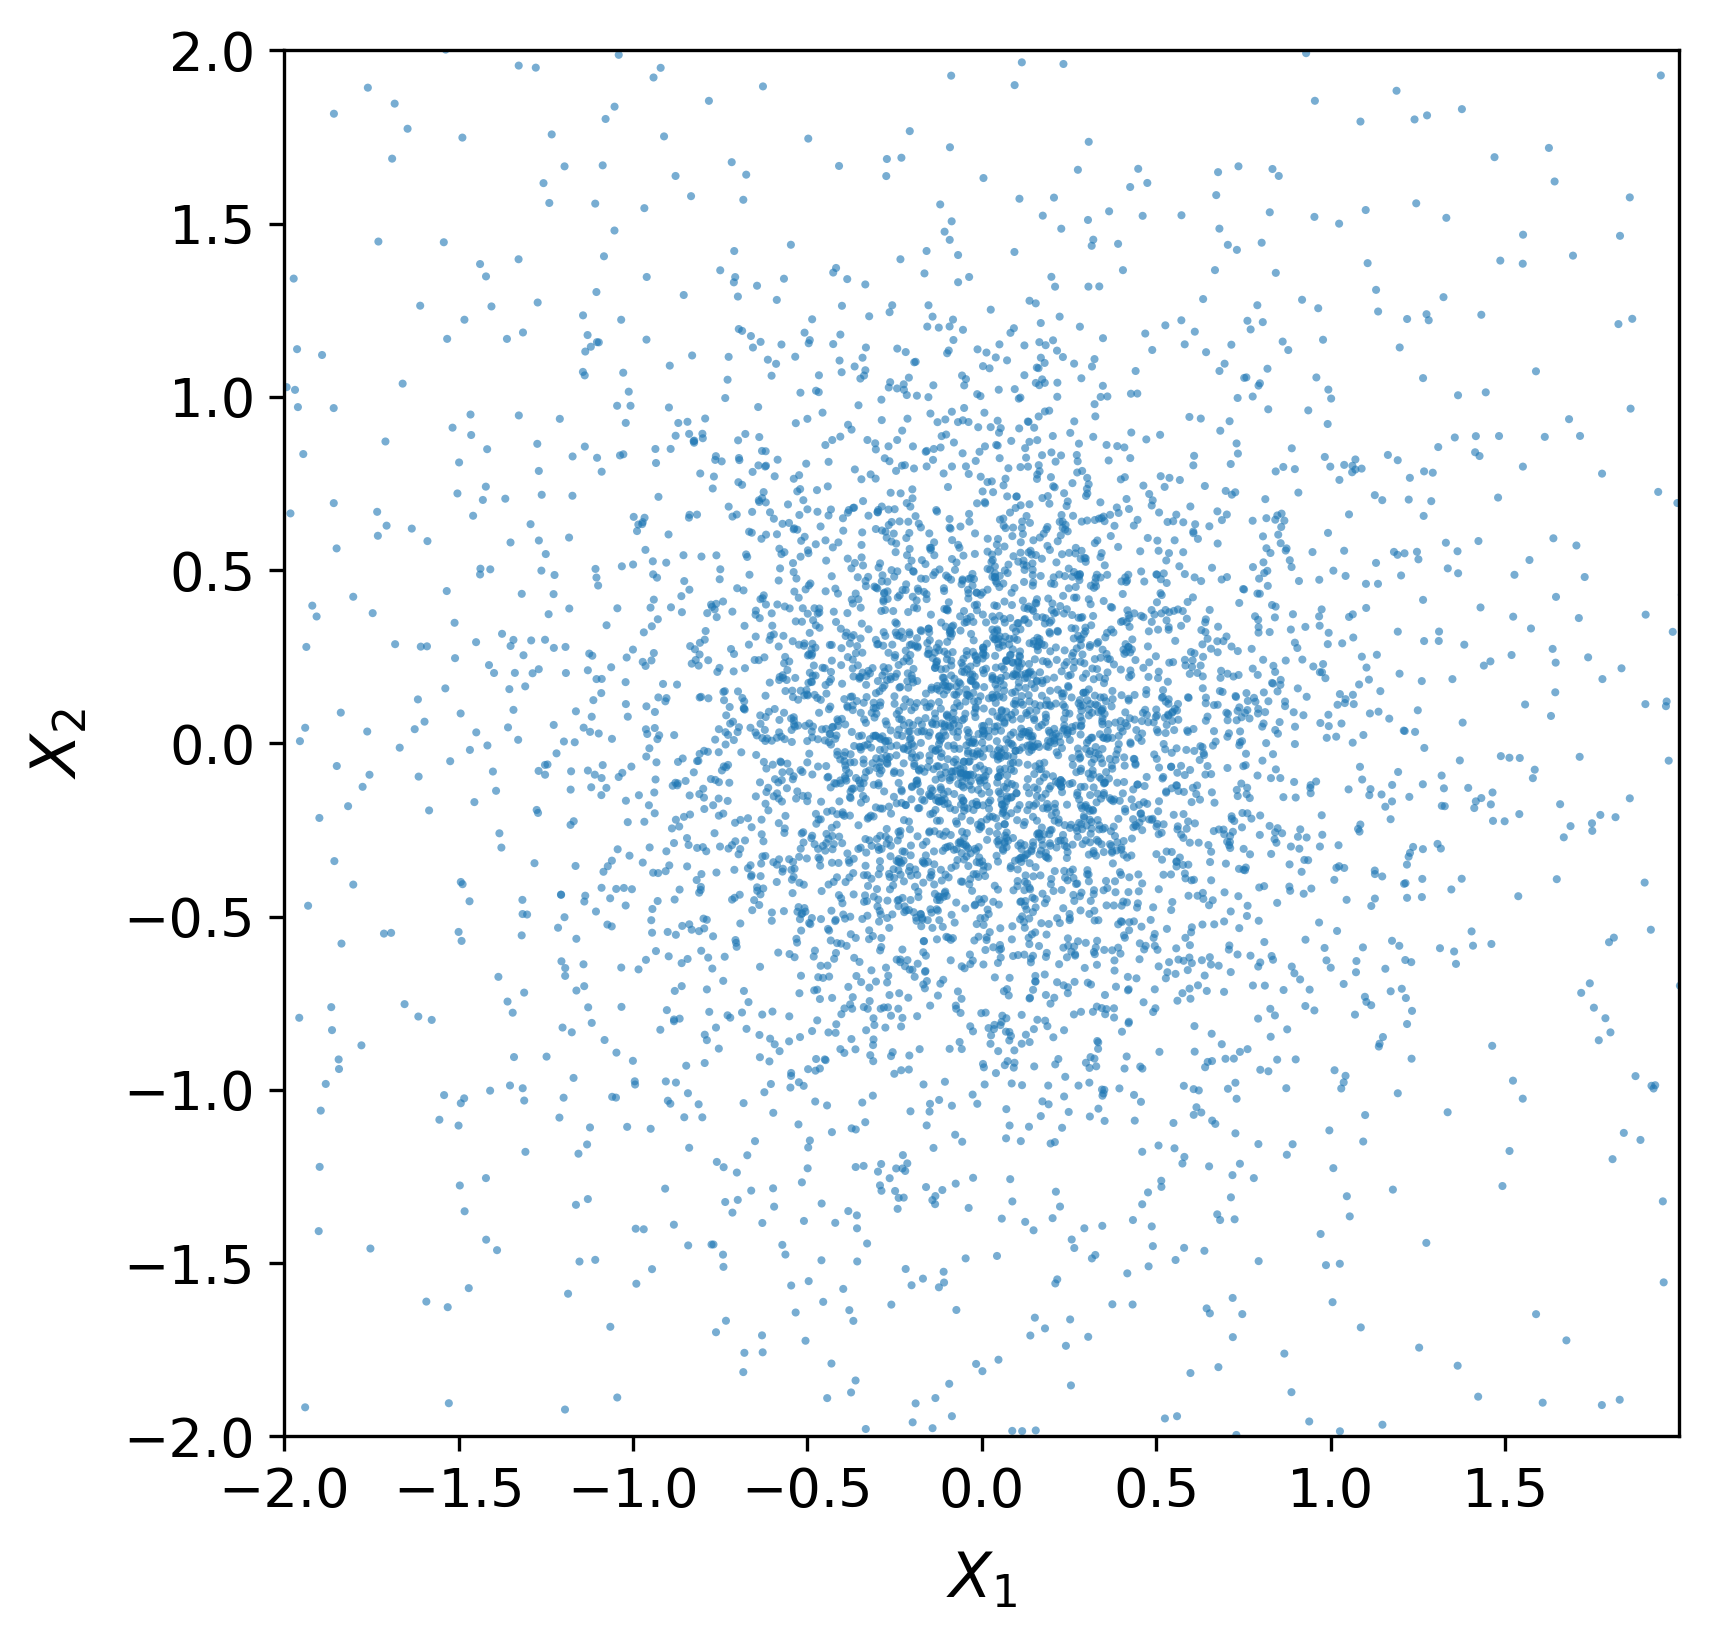

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=25.0 @ T=2.0...


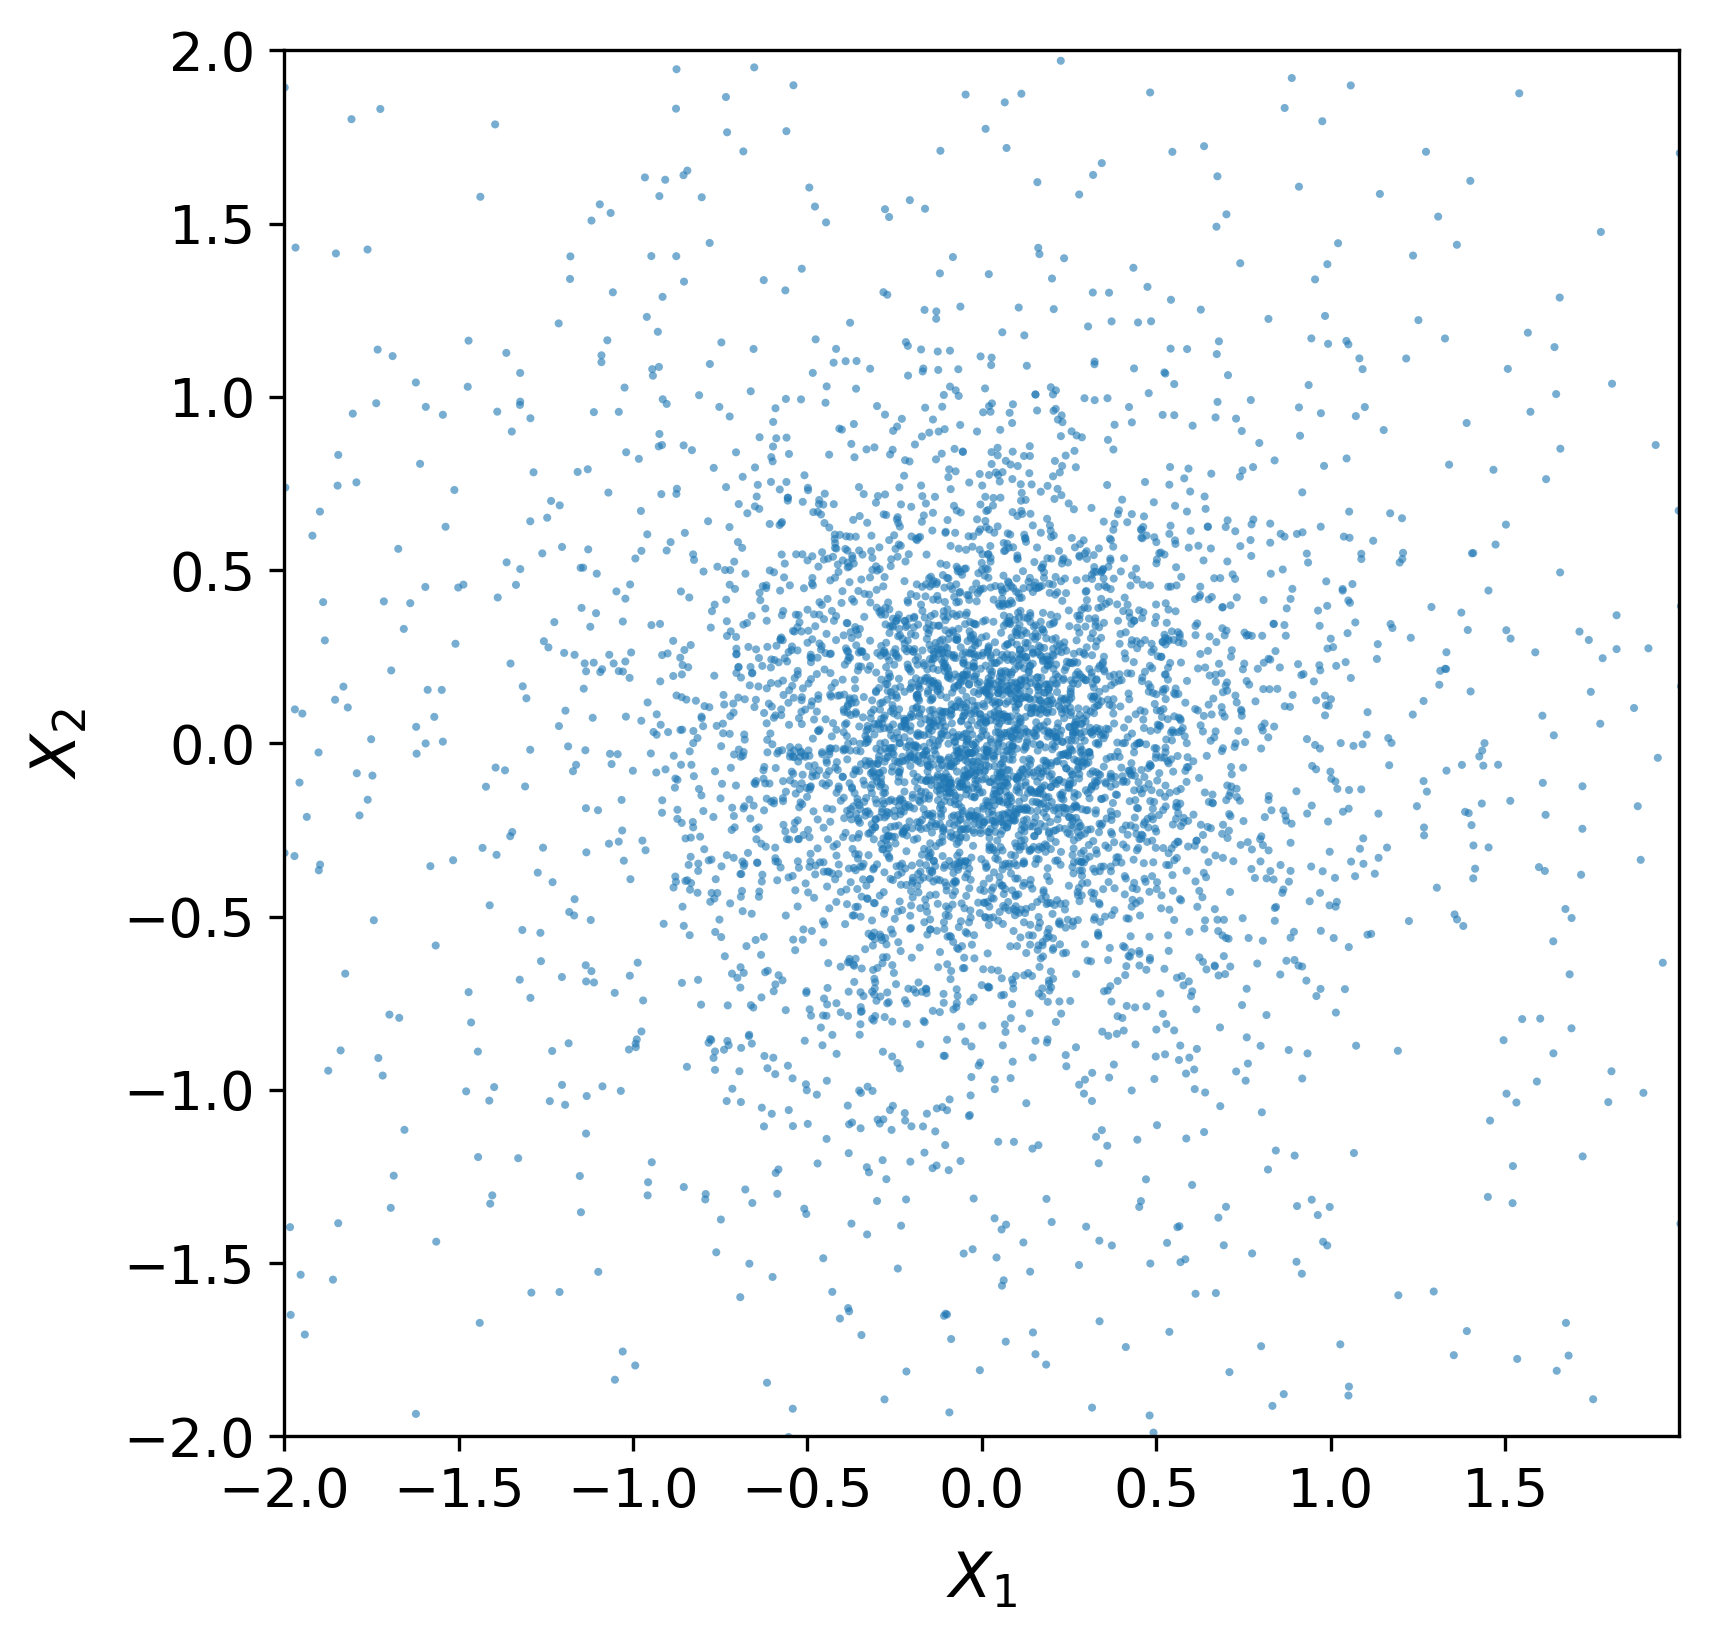

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=26.0 @ T=2.0...


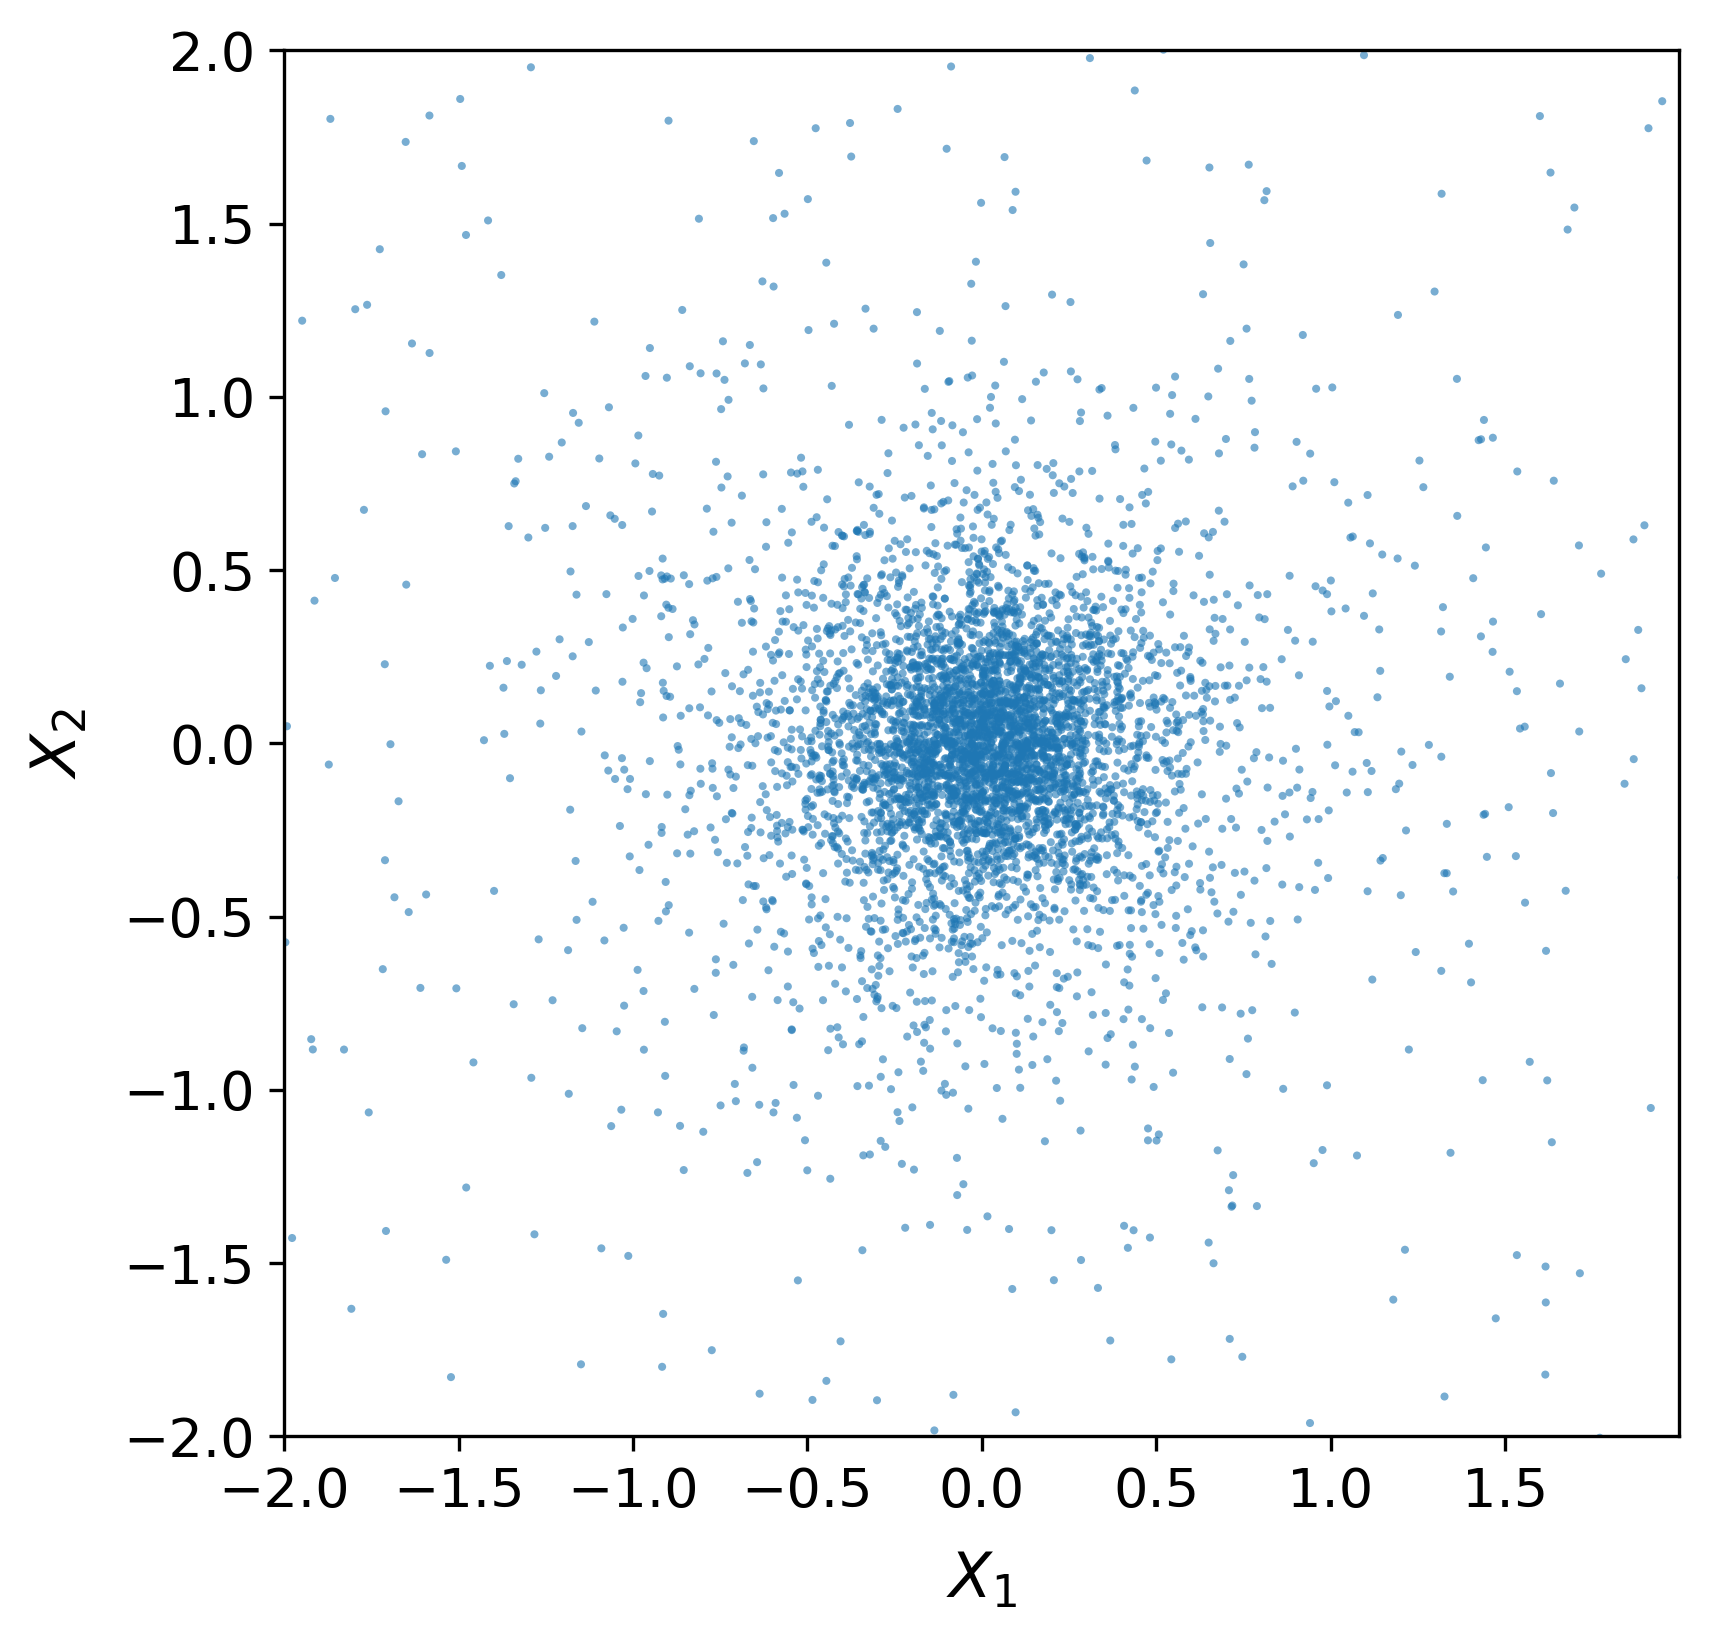

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


M0=27.0 @ T=2.0...


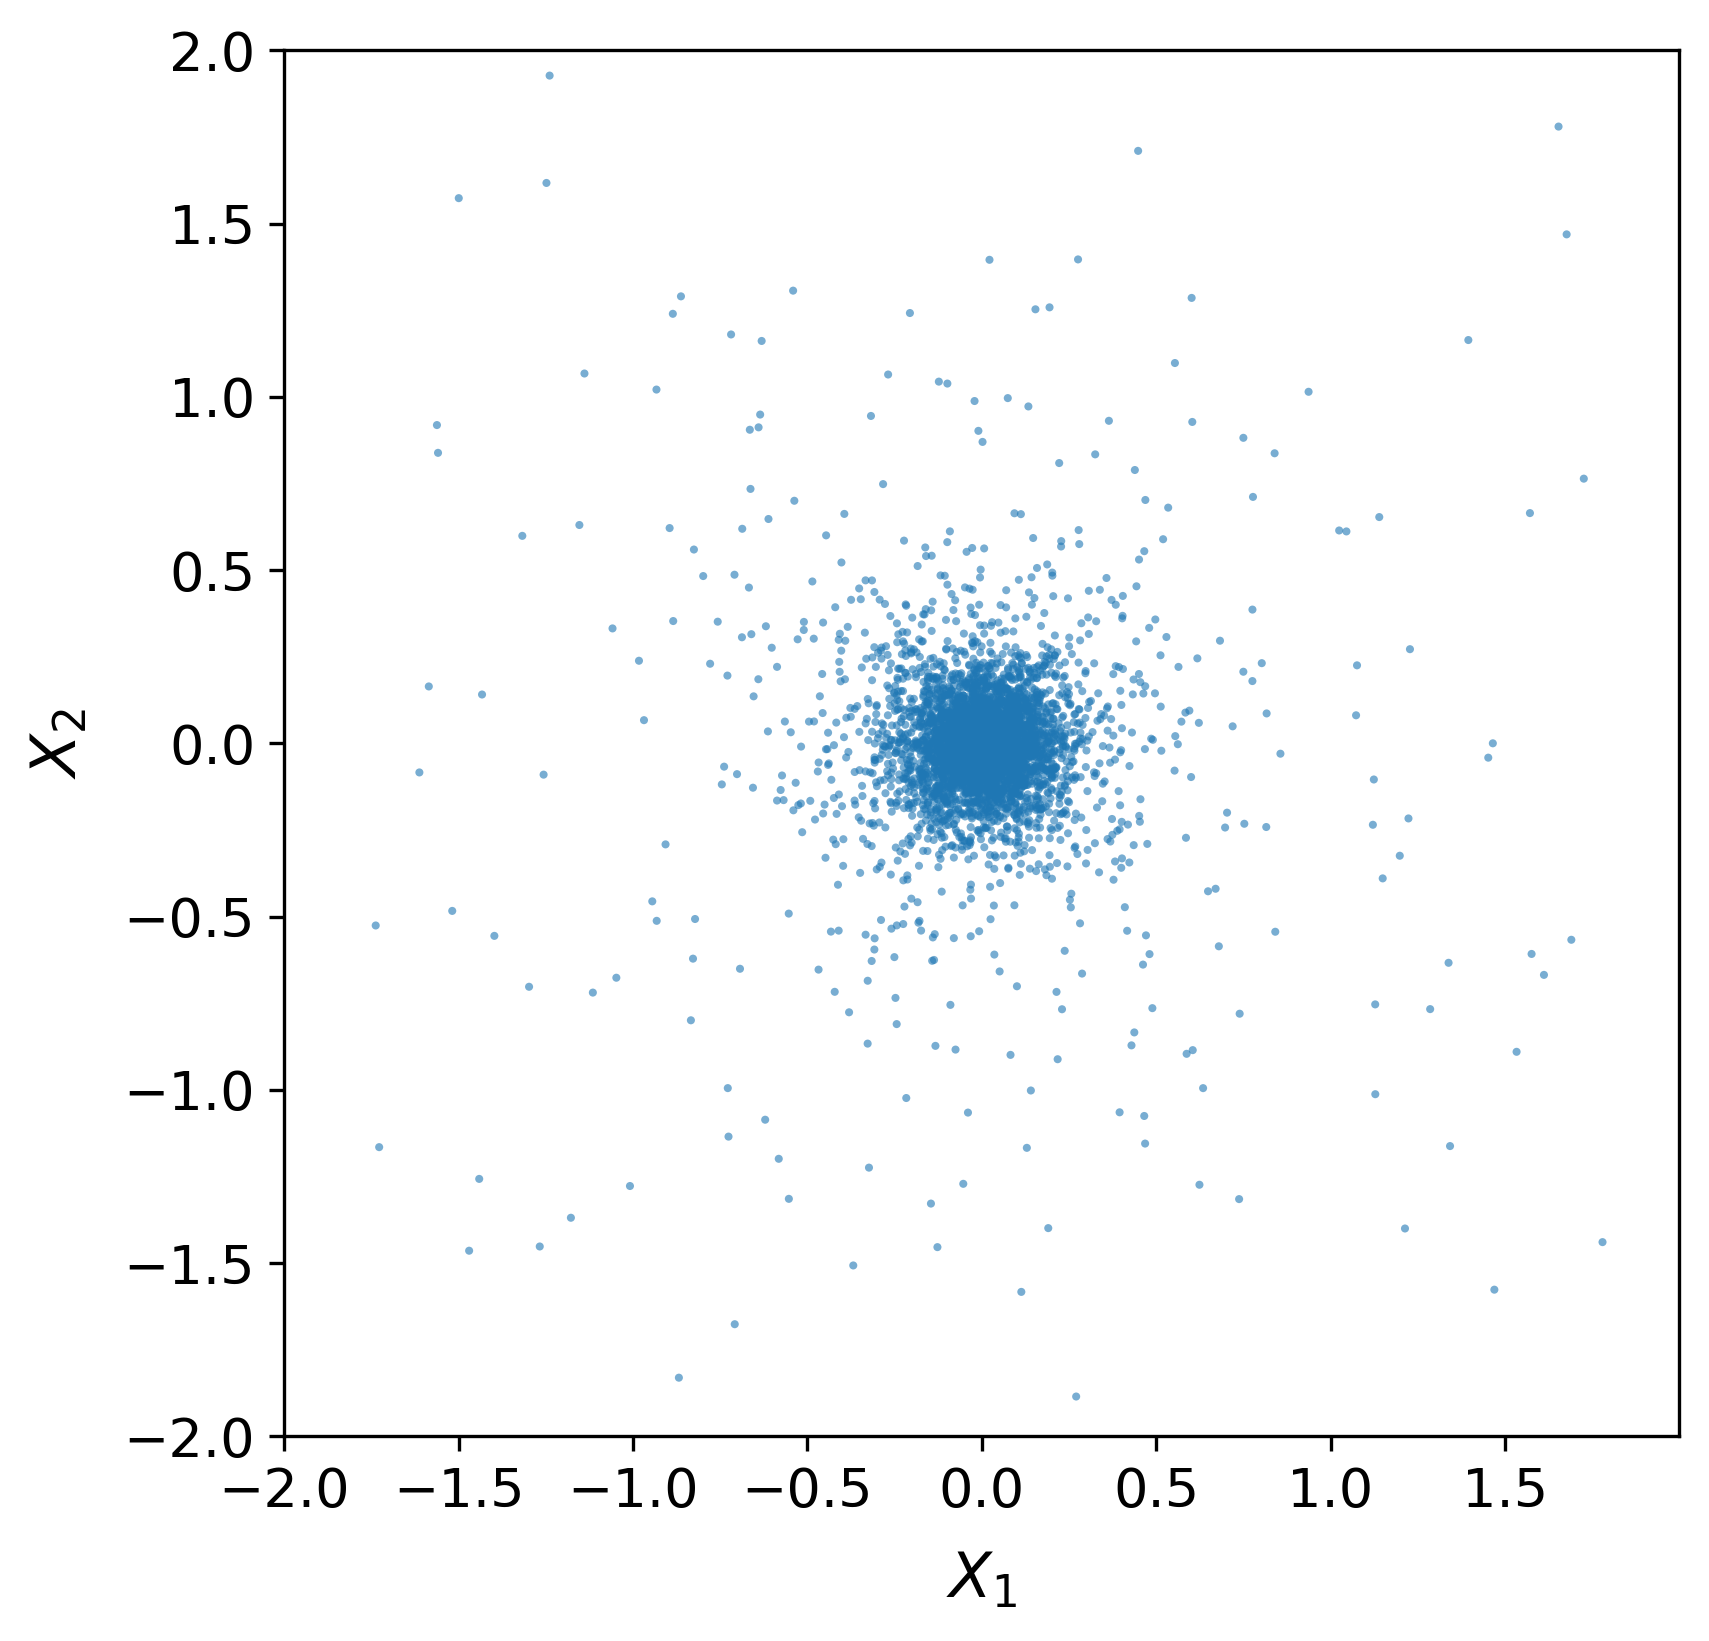

Completed.


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os


M0_list = [22.0,23.0,24.0,25.0,26.0,27.0]
T_list = [2.0]
sample_size = 5000
H = 2048
output_dir = "2d_figures"
data_dir = "2Ddata"
color = '#1f77b4'

os.makedirs(output_dir, exist_ok=True)

def load_and_plot(M0, T):
    time_int = int(T)
    time_frac = int(round((T - time_int) * 1e6))
    filename = os.path.join(data_dir, f"M{M0:.1f}_{time_int}_{time_frac:06d}.npy")
    
    try:
        full_data = np.load(filename)
        data = full_data[:sample_size] if len(full_data) > sample_size else full_data
    except FileNotFoundError:
        print(f"Missing: {filename}")
        return
    
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:,0], data[:,1], 
                c=color, 
                s=15,
                alpha=0.6,
                marker='.',
                edgecolors='none')
    
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel("$X_1$", fontsize=15, labelpad=8)
    plt.ylabel("$X_2$", fontsize=15, labelpad=8)
    plt.xticks(np.arange(-2, 2, 0.5))
    plt.xticks(np.arange(-2, 2, 0.5))
    plt.tick_params(axis='both', labelsize=13)
    
    base_name = f"M{M0:.1f}_T{T:.1f}".replace('.', '_')
    output_path = os.path.join(output_dir, f"{base_name}.eps")
    
    plt.savefig(output_path, 
                format='eps',
               dpi=300, 
               bbox_inches='tight',
               facecolor='white')
    plt.show()
    plt.close()

for M0 in M0_list:
    for T in T_list:
        print(f"M0={M0:.1f} @ T={T}...")
        load_and_plot(M0, T)

print("Completed.")